In [1]:
# !pip install nltk textblob

DEPRECATION: pytorch-lightning 1.5.5 has a non-standard dependency specifier torch>=1.7.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.36ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
# !pip install keras-core --upgrade
# !pip install -q keras-nlp
# !pip install seaborn

In [3]:
# !pip install transformers

# Import the Libararies

In [4]:
# !pip install pandas

In [5]:
# !pip install tqdm

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
# import tensorflow as tf
# import keras_core as keras
# import keras_nlp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
# print("TensorFlow version:", tf.__version__)
import re
from tqdm.auto import tqdm
tqdm.pandas()
from tqdm import tqdm
# from sentence_transformers import SentenceTransformer
# from scipy.spatial.distance import cosine
import random
# print("Keras version:", keras.__version__)
# print("KerasNLP version:", keras_nlp.__version__)

# import os
# os.environ['KERAS_BACKEND'] = 'tensorflow'
# from transformers import TFRobertaForSequenceClassification
from sklearn.model_selection import train_test_split

# Load the data


In [7]:
# clean = pd.read_csv('cleaned_data_3_clean.csv')

In [2]:
train_prompts = pd.read_csv('train_prompts.csv') #('/kaggle/input/llm-detect-ai-generated-text/train_prompts.csv')
train_essays = pd.read_csv('train_essays.csv')#('/kaggle/input/llm-detect-ai-generated-text/train_essays.csv')
test_essays = pd.read_csv('test_essays.csv')#('/kaggle/input/llm-detect-ai-generated-text/test_essays.csv')
train_extra = pd.read_csv('train_v3_drcat_01.csv')#('/kaggle/input/daigt-v3-train-dataset/train_v3_drcat_01.csv')
train_extra_2 = pd.read_csv('train_v3_drcat_02.csv')#('/kaggle/input/daigt-v3-train-dataset/train_v3_drcat_02.csv')
train_extra_3 = pd.read_csv('train_drcat_01.csv')
train_extra_4 = pd.read_csv('train_drcat_02.csv')
train_extra_5 = pd.read_csv('train_drcat_03.csv')
train_extra_6 = pd.read_csv('train_drcat_04.csv')

# 🐝데이터 준비 (train+extra)

Text(0.5, 1.0, 'Distribution of Generated Text')

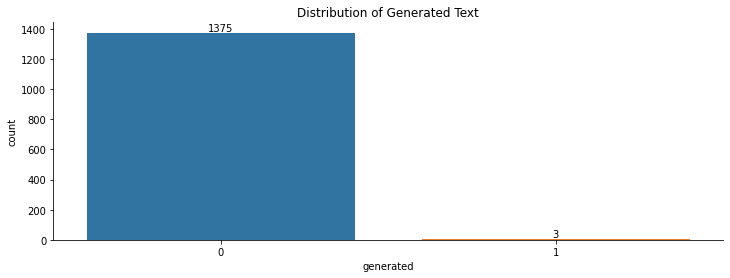

In [3]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()
ax = sns.countplot(data=train_essays,
                   x="generated")

abs_values = train_essays['generated'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of Generated Text")

In [4]:
train_essays['text_length'] = train_essays['text'].apply(lambda x: len(str(x)))

# 'text' 열을 문자열로 캐스팅하고 리스트로 변환
train_essays_sen = train_essays['text'].astype(str).tolist()

# 각 텍스트의 문장 수를 세어 새로운 열에 저장
train_essays['sentence_count'] = [text.count('.') + text.count('!') + text.count('?') for text in train_essays_sen]
# df_train_extra_stu.drop(['prompt_name','source','RDizzl3_seven','model'],axis=1,inplace=True)

train_essays.drop(['id','prompt_id'],axis=1,inplace=True)

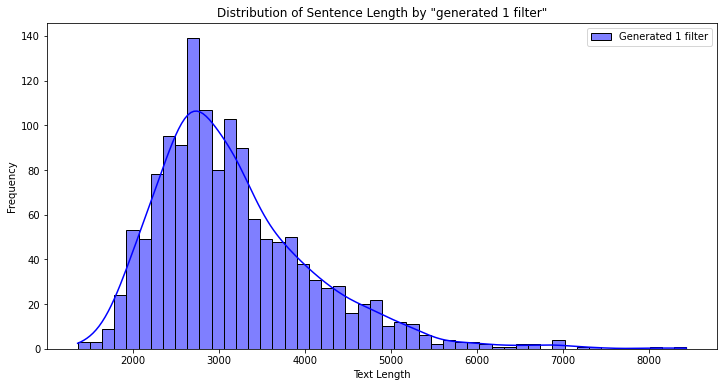

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting the histogram
plt.figure(figsize=(12, 6))
sns.histplot(train_essays['text_length'], bins=50, color='blue', label='Generated 1 filter', kde=True)
plt.title('Distribution of Sentence Length by "generated 1 filter"')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [6]:
train_essays = train_essays.loc[(train_essays['text_length'] >= 746) & (train_essays['text_length'] <= 6000)]

In [7]:
# 'generated' 열 값이 0인 경우와 1인 경우를 분리
generated_0_counts1 = train_essays[train_essays['generated'] == 0]['sentence_count'].value_counts().reset_index()
generated_0_counts1.columns = ['sentence_count', 'generated_0_count']

generated_1_counts1 = train_essays[train_essays['generated'] == 1]['sentence_count'].value_counts().reset_index()
generated_1_counts1.columns = ['sentence_count', 'generated_1_count']

# 결과를 오름차순으로 정렬
generated_0_counts1 = generated_0_counts1.sort_values(by='sentence_count')
generated_1_counts1 = generated_1_counts1.sort_values(by='sentence_count')

# 출력
print("Generated 0:")
print(generated_0_counts1)

print("\nGenerated 1:")
print(generated_1_counts1)


Generated 0:
    sentence_count  generated_0_count
50               7                  1
39              11                  5
51              12                  1
40              13                  4
37              14                  6
30              15                 13
25              16                 19
22              17                 22
20              18                 32
17              19                 36
16              20                 40
10              21                 52
11              22                 52
8               23                 54
1               24                 70
2               25                 70
0               26                 72
3               27                 69
5               28                 57
7               29                 54
4               30                 67
9               31                 53
6               32                 54
13              33                 44
14              34                 44

In [8]:
for index, row in train_essays[(train_essays['generated'] == 1) & (train_essays['sentence_count'] == 15)].iterrows():
    print(row['text'])
    print("-" * 40)  # 경계선 출력

Limiting car use causes pollution, increases costs to users regardless of where services or services are offered. Furthermore, over use of the gas results in increased environmental degradation, harming our resources while damaging our environment.

When consumers pay a larger amount before gasoline is refined then there are higher costs of running the engine than otherwise. There are fewer places where the gas can be purchased locally causing more problems. Car trips will usually have higher tolls which results in lost wages for the transportation worker, who goes to an unnecessary location for work and then returns home and gets to pay back his transportation back costs. The car accident rate amongst children also has increased. Car pollution can become airborne easily, contaminating children's health. Also children tend to be more careless and more often in accidents simply because of being pushed out of their cars onto the road. All of this can be done to better an already polluted

In [9]:
train_essays.head()

,text,generated,text_length,sentence_count
0,Cars. Cars have been around since they became ...,0,3289,26
1,Transportation is a large necessity in most co...,0,2738,27
2,"""America's love affair with it's vehicles seem...",0,4428,48
3,How often do you ride in a car? Do you drive a...,0,4013,54
4,Cars are a wonderful thing. They are perhaps o...,0,4698,53


In [10]:
train_essays.describe()

,generated,text_length,sentence_count
count,1362.000000,1362.000000,1362.000000
mean,0.002203,3125.391336,30.053598
std,0.046898,829.878047,9.546633
min,0.000000,1356.000000,7.000000
25%,0.000000,2550.250000,24.000000
50%,0.000000,2977.500000,29.000000
75%,0.000000,3596.750000,35.000000
max,1.000000,5977.000000,74.000000


In [17]:
train_essays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1362 entries, 0 to 1377
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            1362 non-null   object
 1   generated       1362 non-null   int64 
 2   text_length     1362 non-null   int64 
 3   sentence_count  1362 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 53.2+ KB


# ====== train_extra로부터 데이터 증강 ==========

In [11]:
df_train_extra_stu=pd.concat([train_extra,train_extra_2,train_extra_3,train_extra_4,train_extra_5,train_extra_6],ignore_index=True)

df_train_extra_stu.rename(columns = {"label":"generated"}, inplace=True)

In [12]:
excluded_prompt_name_list = ['Distance learning','Grades for extracurricular activities','Summer projects']
df_train_extra_stu = df_train_extra_stu[~(df_train_extra_stu['prompt_name'].isin(excluded_prompt_name_list))]
df_train_extra_stu = df_train_extra_stu.drop_duplicates(subset=['text'])
df_train_extra_stu.reset_index(drop=True, inplace=True)

In [13]:
df_train_extra_stu.describe()

,generated,fold
count,81638.000000,12740.000000
mean,0.635158,2.862166
std,0.481389,2.362607
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,3.000000
75%,1.000000,4.000000
max,1.000000,9.000000


In [14]:
unique_prompt_names = df_train_extra_stu['prompt_name'].unique()
print(unique_prompt_names)

['Phones and driving' 'Car-free cities' '"A Cowboy Who Rode the Waves"'
 'Mandatory extracurricular activities' 'Exploring Venus'
 'Facial action coding system' 'The Face on Mars' 'Community service'
 'Driverless cars' 'Does the electoral college work?'
 'Cell phones at school' 'Seeking multiple opinions' nan]


In [16]:
# generated 열 값이 0인 행들만 추출하여 새로운 데이터프레임 생성
df_train_extra_stu1 = df_train_extra_stu[df_train_extra_stu['generated'] == 1]
df_train_extra_stu0 = df_train_extra_stu[df_train_extra_stu['generated'] == 0]
# df_train_extra_stu = df_train_extra_stu.drop(columns=["prompt_name", "RDizzl3_seven", 'model'])

# df_train_extra_stu = df_train_extra_stu[df_train_extra_stu['source'] == 'train_essays']

# 새로운 데이터프레임 확인
print(df_train_extra_stu1)
print(df_train_extra_stu0)

                                                    text  generated  \
20463   In recent years, technology has had a profoun...          1   
20464  One way school administrators can attempt to c...          1   
20465  The use of Facial Action Coding System (FACS) ...          1   
20466   Date 3/11/2020\n\nName Generic_Name\n\nTest E...          1   
20467   When it comes to seeking advice or assistance...          1   
...                                                  ...        ...   
81633  There are compelling arguments on both sides o...          1   
81634  While distance learning provides flexibility t...          1   
81635  While distance learning offers flexibility and...          1   
81636  Schools should allow student-designed summer p...          1   
81637  While both teacher-designed and student-design...          1   

                       prompt_name                source RDizzl3_seven model  \
20463              Car-free cities  mistral7binstruct_v2          T

In [17]:
df_train_extra_stu = pd.concat([df_train_extra_stu0,df_train_extra_stu1])

In [18]:
# 공백 제거
df_train_extra_stu.dropna(subset=['text'], inplace=True)
df_train_extra_stu['text'] = df_train_extra_stu['text'].str.strip()
df_train_extra_stu = df_train_extra_stu[df_train_extra_stu['text'] != ""]

# 중복된 텍스트 제거
df_train_extra_stu.drop_duplicates(subset='text', keep='first', inplace=True)

In [19]:
import re

# 공백 제거
df_train_extra_stu.dropna(subset=['text'], inplace=True)
df_train_extra_stu['text'] = df_train_extra_stu['text'].str.strip()
df_train_extra_stu = df_train_extra_stu[df_train_extra_stu['text'] != ""]

def clean_text(text):
    # 줄넘김 기호를 공백으로 대체
    text = re.sub(r'[\r\n]', ' ', text)
    # 연속된 마침표 제거 (단, 단일 마침표는 유지)
    text = re.sub(r'\.{2,}', '', text)
        # 연속된 물음표와 느낌표를 하나로 축소
    text = re.sub(r'\?{2,}', '?', text)
    text = re.sub(r'!{2,}', '!', text)
    # 특수 문자 제거 (단, 영문자, 숫자, 밑줄, 공백, 단일 마침표, 물음표, 느낌표는 유지)
    text = re.sub(r'[^\w\s.?!]', '', text)
    
#     # 연속되는 동일한 단어 또는 구문 제거 (예: 'I I I I...' 또는 'Claim The Face...')
#     text = re.sub(r'(\b\w+\b)( \1\b)+', r'\1', text)
    return text

def is_text_too_short(text, min_length=150):
    # 텍스트 길이가 최소 길이보다 짧은지 확인
    return len(text) > min_length

# DataFrame의 'text' 컬럼에 clean_text 함수 적용
df_train_extra_stu['text'] = df_train_extra_stu['text'].progress_apply(clean_text)

# 너무 짧은 텍스트 필터링
df_train_extra_stu = df_train_extra_stu[df_train_extra_stu['text'].progress_apply(is_text_too_short)]


# 중복된 텍스트 제거
df_train_extra_stu.drop_duplicates(subset='text', keep='first', inplace=True)


# def has_repeated_sentences(text):
#     # 단어 또는 구문의 반복을 체크하는 함수
#     # '\b'는 단어 경계를 나타냄, '(.+)'는 임의의 문자열, '\s'는 공백, '\1'은 첫번째 캡쳐된 그룹
#     if re.search(r'(\b.+)\b\s+\1', text):
#         return True
#     return False

# # 'text' 컬럼에서 반복되는 문장을 포함하는 행을 필터링하고 제거
# df_train_extra_stu = df_train_extra_stu[df_train_extra_stu['text'].progress_apply(has_repeated_sentences)]



  0%|          | 0/76317 [00:00<?, ?it/s]

  0%|          | 0/76317 [00:00<?, ?it/s]

In [33]:

# def remove_repeated_phrases(text, min_repeats=4):
#     # 반복되는 구문을 찾고, 최소 반복 횟수보다 많이 반복되면 제거
#     pattern = r'(.*?)( \1)+'
#     while True:
#         text, num_subs = re.subn(pattern, r'\1', text)
#         if num_subs < min_repeats:
#             break
#     return text

# # DataFrame의 'text' 컬럼에 remove_repeated_phrases 함수 적용
# df_train_extra_stu['text'] = df_train_extra_stu['text'].progress_apply(lambda x: remove_repeated_phrases(x))


In [34]:
# import re

# # 공백 제거
# df_train_extra_stu.dropna(subset=['text'], inplace=True)
# df_train_extra_stu['text'] = df_train_extra_stu['text'].str.strip()
# df_train_extra_stu = df_train_extra_stu[df_train_extra_stu['text'] != ""]

# def clean_text(text):
#     # 줄넘김 기호를 공백으로 대체
#     text = re.sub(r'[\r\n]', ' ', text)
#     # 연속된 마침표 제거 (단, 단일 마침표는 유지)
#     text = re.sub(r'\.{2,}', '', text)
#     # 특수 문자 제거 (단, 영문자, 숫자, 밑줄, 공백 및 단일 마침표는 유지)
#     text = re.sub(r'[^\w\s.]', '', text)
#     # 연속되는 동일한 단어 또는 구문 제거 (예: 'I I I I...' 또는 'Claim The Face...')
#     text = re.sub(r'(\b\w+\b)( \1\b)+', r'\1', text)
#     return text

# def is_text_too_short(text, min_length=150):
#     # 텍스트 길이가 최소 길이보다 짧은지 확인
#     return len(text) > min_length

# # DataFrame의 'text' 컬럼에 clean_text 함수 적용
# df_train_extra_stu['text'] = df_train_extra_stu['text'].apply(clean_text)

# # 너무 짧은 텍스트 필터링
# df_train_extra_stu = df_train_extra_stu[df_train_extra_stu['text'].apply(is_text_too_short)]

# # 중복된 텍스트 제거
# df_train_extra_stu.drop_duplicates(subset='text', keep='first', inplace=True)


In [20]:
df_train_extra_stu['text_length'] = df_train_extra_stu['text'].apply(lambda x: len(str(x)))
df_train_extra_stu=df_train_extra_stu.drop(['prompt_name','source','RDizzl3_seven','model'],axis=1)

In [21]:
# 'text' 열을 문자열로 캐스팅하고 리스트로 변환
df_train_extra_stu_sen = df_train_extra_stu['text'].astype(str).tolist()

# 각 텍스트의 문장 수를 세어 새로운 열에 저장
df_train_extra_stu['sentence_count'] = [text.count('.') + text.count('!') + text.count('?') for text in df_train_extra_stu_sen]
# df_train_extra_stu.drop(['prompt_name','source','RDizzl3_seven','model'],axis=1,inplace=True)

In [22]:
df_train_extra_stu.tail()

,text,generated,fold,essay_id,prompt,text_length,sentence_count
81633,There are compelling arguments on both sides o...,1,1.0,darragh_claude_v7_83,Some schools offer distance learning as an opt...,2182,16
81634,While distance learning provides flexibility t...,1,8.0,darragh_claude_v7_738,Some schools offer distance learning as an opt...,1877,15
81635,While distance learning offers flexibility and...,1,8.0,52ac8d801bdf_04112023,NaN,1881,14
81636,Schools should allow studentdesigned summer pr...,1,0.0,darragh_claude_v7_436,Some schools require students to complete summ...,1767,20
81637,While both teacherdesigned and studentdesigned...,1,8.0,darragh_claude_v7_810,Some schools require students to complete summ...,1805,16


In [24]:
df_train_extra_stu=df_train_extra_stu.drop(['fold','essay_id','prompt'],axis=1)

Text(0.5, 1.0, 'Distribution of Generated Text')

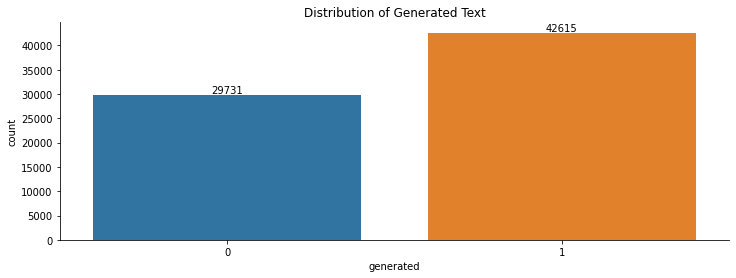

In [25]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()
ax = sns.countplot(data=df_train_extra_stu,
                   x="generated",
                   order=df_train_extra_stu['generated'].value_counts().index[::-1])  # 데이터를 뒤집어서 정렬

abs_values = df_train_extra_stu['generated'].value_counts().values[::-1]  # 데이터를 뒤집어서 정렬

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of Generated Text")


In [39]:
# f, ax = plt.subplots(figsize=(12, 4))

# sns.despine()
# ax = sns.countplot(data=df_train_extra_stu,
#                    x="generated",
#                    order=df_train_extra_stu['generated'].value_counts().index[::-1])  # 데이터를 뒤집어서 정렬

# abs_values = df_train_extra_stu['generated'].value_counts().values[::-1]  # 데이터를 뒤집어서 정렬

# ax.bar_label(container=ax.containers[0], labels=abs_values)

# ax.set_title("Distribution of Generated Text")


In [40]:
# selected_rows1 = df_train_extra_stu[df_train_extra_stu['generated'] == 1]
# selected_rows0 = df_train_extra_stu[df_train_extra_stu['generated'] == 0]
# # 선택된 행들에 대해 describe를 수행합니다.
# description1 = selected_rows1.describe()
# description0 = selected_rows0.describe()

# # 결과를 출력합니다.
# print(description0)
# print(description1)

In [41]:
# f, ax = plt.subplots(figsize=(12, 4))

# sns.despine()
# ax = sns.countplot(data=df_train_extra_stu,
#                    x="generated",
#                    order=df_train_extra_stu['generated'].value_counts().index[::-1])  # 데이터를 뒤집어서 정렬

# abs_values = df_train_extra_stu['generated'].value_counts().values[::-1]  # 데이터를 뒤집어서 정렬

# ax.bar_label(container=ax.containers[0], labels=abs_values)

# ax.set_title("Distribution of Generated Text")


In [42]:
# plt.figure(figsize=(16, 6))

# # 'generated'가 0인 경우의 히스토그램
# sns.histplot(df_train_extra_stu[df_train_extra_stu['generated'] == 0]['text_length'], bins=150, color='blue', label='Generated 0', kde=True)

# # 'generated'가 1인 경우의 히스토그램
# sns.histplot(df_train_extra_stu[df_train_extra_stu['generated'] == 1]['text_length'], bins=150, color='red', label='Generated 1', kde=True)

# plt.title('Distribution of word count by "generated"')
# plt.xlabel('Text Length')
# plt.ylabel('Frequency')
# plt.legend()
# plt.show()


In [43]:
# plt.figure(figsize=(16, 6))

# # 'generated'가 0인 경우의 히스토그램
# sns.histplot(df_train_extra_stu[df_train_extra_stu['generated'] == 0]['sentence_count'], bins=150, color='blue', label='Generated 0', kde=True)

# # 'generated'가 1인 경우의 히스토그램
# sns.histplot(df_train_extra_stu[df_train_extra_stu['generated'] == 1]['sentence_count'], bins=150, color='red', label='Generated 1', kde=True)

# plt.title('Distribution of Sentence count by "generated"')
# plt.xlabel('sentence_count')
# plt.ylabel('Frequency')
# plt.legend()
# plt.show()


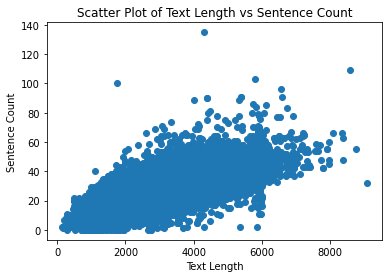

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# 데이터프레임 예시 (df_train_extra_stu)
# df_train_extra_stu = pd.DataFrame({
#     'text_length': [100, 200, 300, 400],
#     'sentence_count': [10, 20, 30, 40]
# })

# 산점도 생성
plt.scatter(df_train_extra_stu['text_length'], df_train_extra_stu['sentence_count'])
plt.xlabel('Text Length')
plt.ylabel('Sentence Count')
plt.title('Scatter Plot of Text Length vs Sentence Count')
plt.show()


In [45]:
# # 상관계수 계산
# correlation = df_train_extra_stu['text_length'].corr(df_train_extra_stu['sentence_count'])
# print("Correlation coefficient:", correlation)


In [46]:
# selected_rows1 = df_train_extra_stu[df_train_extra_stu['generated'] == 1]
# selected_rows0 = df_train_extra_stu[df_train_extra_stu['generated'] == 0]
# # 선택된 행들에 대해 describe를 수행합니다.
# description1 = selected_rows1.describe()
# description0 = selected_rows0.describe()

# # 결과를 출력합니다.
# print(description0)
# print(description1)

In [47]:
# # 'generated' 열 값이 0인 경우와 1인 경우를 분리
# generated_0_counts = df_train_extra_stu[df_train_extra_stu['generated'] == 0]['sentence_count'].value_counts().reset_index()
# generated_0_counts.columns = ['sentence_count', 'generated_0_count']

# generated_1_counts = df_train_extra_stu[df_train_extra_stu['generated'] == 1]['sentence_count'].value_counts().reset_index()
# generated_1_counts.columns = ['sentence_count', 'generated_1_count']

# # 결과를 오름차순으로 정렬
# generated_0_counts = generated_0_counts.sort_values(by='sentence_count')
# generated_1_counts = generated_1_counts.sort_values(by='sentence_count')

# # 출력
# print("Generated 0:")
# print(generated_0_counts)

# print("\nGenerated 1:")
# print(generated_1_counts)


In [48]:
# for index, row in df_train_extra_stu[(df_train_extra_stu['generated'] == 1) & (df_train_extra_stu['sentence_count'] == 3)].iterrows():
#     print(row['text'])
#     print("-" * 40)  # 경계선 출력

In [27]:
# 정제된 데이터를 CSV 파일로 저장
df_train_extra_stu.to_csv('70000data.csv', index=False)

In [50]:
# df_train_extra_stu = pd.read_csv('cleaned_data_3_clean.csv')

In [51]:
# # Create a figure with two subplots
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# # Plot the histogram for 'text_length' with generated=0
# sns.histplot(filtered_rows0[filtered_rows0['generated'] == 0]['text_length'], bins=50, color='blue', label='Generated 0', kde=True, ax=ax1)
# ax1.set_title('Distribution of Sentence Length by "generated 0"')
# ax1.set_xlabel('Text Length')
# ax1.set_ylabel('Frequency')
# ax1.legend()

# # Plot the histogram for 'text_length' with generated=1
# sns.histplot(filtered_rows1[filtered_rows1['generated'] == 1]['text_length'], bins=50, color='red', label='Generated 1', kde=True, ax=ax2)
# ax2.set_title('Distribution of Sentence Length by "generated 1"')
# ax2.set_xlabel('Text Length')
# ax2.set_ylabel('Frequency')
# ax2.legend()

# plt.show()


In [52]:
# plt.figure(figsize=(16, 6))

# # 'generated'가 0인 경우의 히스토그램
# sns.histplot(filtered_rows0[filtered_rows0['generated'] == 0]['text_length'], bins=50, color='blue', label='Generated 0', kde=True)

# # 'generated'가 1인 경우의 히스토그램
# sns.histplot(filtered_rows1[filtered_rows1['generated'] == 1]['text_length'], bins=50, color='red', label='Generated 1', kde=True)

# plt.title('Distribution of Sentence Length by "generated"')
# plt.xlabel('Text Length')
# plt.ylabel('Frequency')
# plt.legend()
# plt.show()


# =====df_train_essays_final 데이터셋 준비=======

In [28]:
df_train_essays_final = pd.concat([train_essays,df_train_extra_stu],axis=0)

Text(0.5, 1.0, 'Distribution of Generated Text')

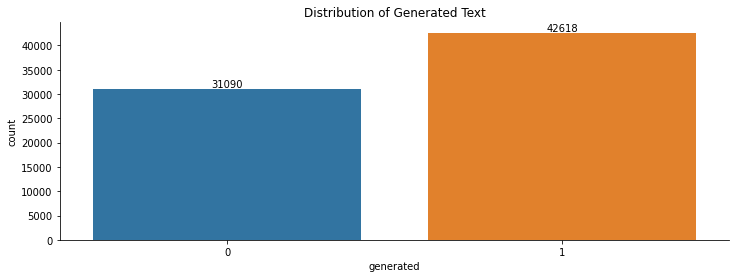

In [29]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()
ax = sns.countplot(data=df_train_essays_final,
                   x="generated",
                   order=df_train_essays_final['generated'].value_counts().index[::-1])  # 데이터를 뒤집어서 정렬

abs_values = df_train_essays_final['generated'].value_counts().values[::-1]  # 데이터를 뒤집어서 정렬

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of Generated Text")


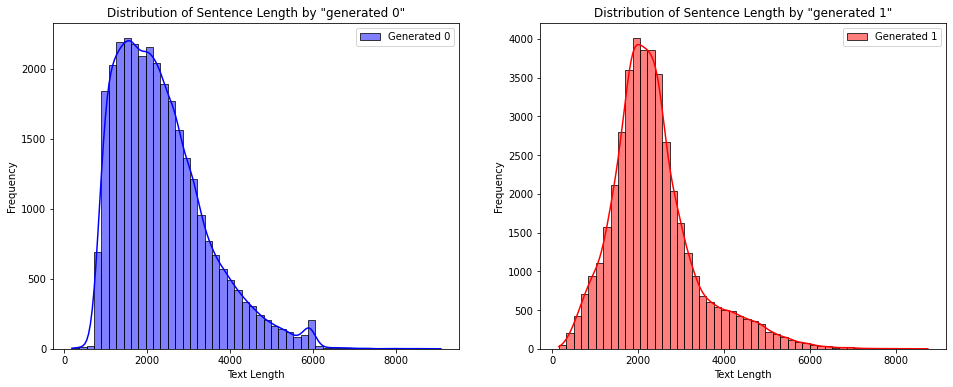

In [30]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the histogram for 'text_length' with generated=0
sns.histplot(df_train_essays_final[df_train_essays_final['generated'] == 0]['text_length'], bins=50, color='blue', label='Generated 0', kde=True, ax=ax1)
ax1.set_title('Distribution of Sentence Length by "generated 0"')
ax1.set_xlabel('Text Length')
ax1.set_ylabel('Frequency')
ax1.legend()

# Plot the histogram for 'text_length' with generated=1
sns.histplot(df_train_essays_final[df_train_essays_final['generated'] == 1]['text_length'], bins=50, color='red', label='Generated 1', kde=True, ax=ax2)
ax2.set_title('Distribution of Sentence Length by "generated 1"')
ax2.set_xlabel('Text Length')
ax2.set_ylabel('Frequency')
ax2.legend()

plt.show()


In [31]:
df_train_essays_final = df_train_essays_final.drop(['text_length', 'sentence_count'],axis=1)

In [32]:
df_train_essays_final.head()

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0


In [58]:
df_train_essays_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18439 entries, 0 to 17076
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       18439 non-null  object
 1   generated  18439 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 948.2+ KB


# ========================
# =====================================

# ==========오타수정 라이브러리 대기===========
# =========================================

# ❓ 오타수정 library 적용 유무 (24.01.10 : X)

In [59]:
# !pip install pyspellchecker

In [60]:
# from spellchecker import SpellChecker

# spell = SpellChecker()
# misspelled = spell.unknown(['let', 'us', 'wlak', 'on', 'the', 'groun'])

# for word in misspelled:
#     print(f'Misspelled word: {word}')
#     print(f'Suggestion: {spell.correction(word)}')


In [61]:
# !pip install textblob

In [62]:
# from textblob import TextBlob

# text = "I havv goood speling"
# blob = TextBlob(text)

# corrected_text = blob.correct()
# print(corrected_text)

In [63]:
# !pip install hunspell

In [64]:
# import hunspell

# # Hunspell 객체 생성 (사전 파일 필요)
# hun = hunspell.HunSpell('/usr/share/hunspell/en_US.dic', '/usr/share/hunspell/en_US.aff')

# # 스펠 체크
# word = "speling"
# if not hun.spell(word):
#     print(f'Misspelled word: {word}')
#     suggestions = hun.suggest(word)
#     print(f'Suggestions: {suggestions}')

# 🐝 **토큰화 진행 (WordPiece vs BPE)** 

# BPE

In [33]:
from tokenizers import(
    decoders,
    models,
    normalizers,
    pre_tokenizers,
    processors,
    trainers,
        Tokenizer,
)
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace

from transformers import PreTrainedTokenizerFast

from datasets import Dataset
from tqdm.auto import tqdm
from tokenizers import processors

In [34]:
LOWERCASE = False
VOCAB_SIZE = 30522

In [35]:
# Tokenizer 초기화
raw_tokenizer = Tokenizer(models.BPE(unk_token="[UNK]"))

# Normalizer 설정
raw_tokenizer.normalizer = normalizers.Sequence([normalizers.NFC()] + [normalizers.Lowercase()] if LOWERCASE else [])

# Pre-tokenizer 설정: Byte-Level pre-tokenizer를 사용
# "Ġ" 문자 제거 하고 싶다면 -> add_prefix_space=False 추가
raw_tokenizer.pre_tokenizer = pre_tokenizers.ByteLevel()

# BPE Trainer 설정 및 스페셜 토큰 추가
special_tokens = ["[UNK]", "[PAD]", "[CLS]", "[SEP]", "[MASK]"]
trainer = trainers.BpeTrainer(vocab_size=VOCAB_SIZE, special_tokens=special_tokens)

# 데이터셋 로드 및 토크나이저 훈련 (훈련 셋 : df_train_essays_final[['text']])
dataset = Dataset.from_pandas(df_train_essays_final[['text']])
def train_corp_iter(): 
    for i in range(0, len(dataset), 1000):
        yield dataset[i : i + 1000]["text"]
raw_tokenizer.train_from_iterator(train_corp_iter(), trainer=trainer)

# PreTrainedTokenizerFast로 래핑
from transformers import RobertaTokenizerFast

tokenizer = PreTrainedTokenizerFast(
    tokenizer_object=raw_tokenizer,
    unk_token="[UNK]",
    pad_token="[PAD]",
    cls_token="[CLS]",
    sep_token="[SEP]",
    mask_token="[MASK]",
)

In [36]:
# df_train_essays_final['text'] 토큰화 해보기
# test_essays 데이터의 토큰화 진행 상황을 표시
test_input_ids = []
test_attention_masks = []

for text in tqdm(df_train_essays_final['text'].tolist(), desc="토큰화 진행중"):
    encoded = tokenizer.encode_plus(text, 
                                    add_special_tokens=True, 
                                    max_length=256, 
                                    padding='max_length', 
                                    truncation=True, 
                                    return_attention_mask=True, 
                                    return_tensors='np')

    test_input_ids.append(encoded['input_ids'][0])
    test_attention_masks.append(encoded['attention_mask'][0])

토큰화 진행중:   0%|          | 0/73708 [00:00<?, ?it/s]

In [37]:

    # 토큰화된 데이터를 pandas DataFrame으로 변환
df_encoded = pd.DataFrame({
    'input_ids': test_input_ids,
    'attention_mask': test_attention_masks
})

In [70]:
# 첫 번째 행의 'input_ids'와 'attention_mask' 열의 데이터 출력
first_row_input_ids = df_encoded['input_ids'].iloc[0]
first_row_attention_mask = df_encoded['attention_mask'].iloc[0]

first_row_input_ids, first_row_attention_mask

(array([ 1264,    11,  1264,   722,  2274,   718,  1229,   711,  3175,
         4453,   168,   182, 11853,    69,    10,  1978, 15856,  5107,
         1160,   390,  3369,   182,   945, 22468,    11,  1264,   722,
         4062,   117,   939,  1986,   168,  1305,   449,   594,  1228,
         1229,  2463,    11,   844,  1947,    10,   230,   474,  3434,
          285,  1934,  1689,   973,   185,   566,   213,   358,   117,
          486,   436,    11,  1353,   503,    10,   973,   182,   458,
          300,   298,   572,   358,   117,   486,   436,   285,   626,
           11,   101,   101,  2686,   293,  1495,   300,  1009,    10,
          733,    10,   928,  2686,  3702,  4080,    10,  3280,  4341,
          597,  1972,  1264,  3944,  1147, 11581,  2532,   415,    10,
         2409,  3782,   474,   182, 14229,   300,  4128,    10,  2144,
         3386,   338,  2424,  1491,  2098, 13126,   565,  9511,  2485,
          285,   352,  1189,  3682,    11, 10227,   665,  2409,  1009,
      

In [38]:
# 데이터프레임에서 필요한 열만 선택
df_encoded = df_encoded[['input_ids', 'attention_mask']]

# 'generated' 열은 레이블로 사용할 것이므로 따로 선택
labels = df_train_essays_final['generated'].values


In [39]:
print("df_encoded shape:", df_encoded.shape)

print("labels:", len(labels))

df_encoded shape: (73708, 2)
labels: 73708


In [40]:
# 학습 및 검증 데이터셋 분리
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(df_encoded, labels, random_state=2018, test_size=0.2)


In [41]:
# 데이터셋 준비
train_inputs = {
    "input_ids": np.array(train_inputs["input_ids"].to_list()),
    "attention_mask": np.array(train_inputs["attention_mask"].to_list()),
    "labels": np.array(train_labels)
}
train_labels = np.array(train_labels)

validation_inputs = {
    "input_ids": np.array(validation_inputs["input_ids"].to_list()),
    "attention_mask": np.array(validation_inputs["attention_mask"].to_list()),
    "labels": np.array(validation_labels)
}
validation_labels = np.array(validation_labels)


In [42]:
# 입력 데이터 형상 확인
print("train_inputs[input_ids] shape:", train_inputs['input_ids'].shape)
print("train_inputs[attention_mask] shape:", train_inputs['attention_mask'].shape)
print("train_inputs[labels] shape:", train_inputs['attention_mask'].shape)
print("validation_inputs[input_ids] shape:", validation_inputs['input_ids'].shape)
print("validation_inputs[attention_mask] shape:", validation_inputs['attention_mask'].shape)
print("validation_inputs[labels] shape:", validation_inputs['attention_mask'].shape)
# 필요한 경우 패딩 또는 트리밍 수행
# 예시: train_inputs['input_ids'] = pad_or_trim(train_inputs['input_ids'], desired_length)

# 모델 학습을 다시 시도


train_inputs[input_ids] shape: (58966, 256)
train_inputs[attention_mask] shape: (58966, 256)
train_inputs[labels] shape: (58966, 256)
validation_inputs[input_ids] shape: (14742, 256)
validation_inputs[attention_mask] shape: (14742, 256)
validation_inputs[labels] shape: (14742, 256)


In [43]:
from datasets import Dataset

In [44]:
train_dataset = Dataset.from_dict(train_inputs)
validation_dataset = Dataset.from_dict(validation_inputs)

In [45]:
print("train_dataset type:", type(train_dataset))
print("validation_dataset type:", type(validation_dataset))

train_dataset type: <class 'datasets.arrow_dataset.Dataset'>
validation_dataset type: <class 'datasets.arrow_dataset.Dataset'>


## WordPiece

In [79]:
# max_length 파라미터 조정을 통한 성능 확인

In [80]:
# problematic_data = df_train_essays_final[df_train_essays_final['text'].apply(lambda x: not isinstance(x, str))]
# print(problematic_data)

In [81]:
# from transformers import RobertaTokenizer
# from tqdm.auto import tqdm
# import pandas as pd

# # BERT 토크나이저 초기화
# tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# # 토큰 길이 계산
# token_lengths = []
# for text in df_train_essays_final['text']:  # 'text_column'은 텍스트가 포함된 컬럼 이름입니다.
#     tokens = tokenizer.encode(text, add_special_tokens=True)
#     token_lengths.append(len(tokens))

    
# df_ = df_train_essays_final.copy()
# # 토큰 길이를 DataFrame에 추가
# df_['text'] = token_lengths

# # 길이 분포 분석
# print(df_['text'].describe())

# # # # 토큰 길이를 DataFrame에 추가
# # df_train_essays_final['text'] = token_lengths

# # # # 길이 분포 분석
# # print(df_train_essays_final['text'].describe())

In [82]:

# # tqdm을 사용하여 토큰화 진행 상황을 표시
# input_ids = []
# attention_masks = []

# for text in tqdm(df_train_essays_final['text'].tolist(), desc="토큰화 진행중"):
#     encoded = tokenizer.encode_plus(text, 
#                                     add_special_tokens=True, 
#                                     max_length=256, 
#                                     padding='max_length', 
#                                     truncation=True, 
#                                     return_attention_mask=True, 
#                                     return_tensors='np')
#     input_ids.append(encoded['input_ids'][0])
#     attention_masks.append(encoded['attention_mask'][0])

# # 토큰화된 데이터를 pandas DataFrame으로 변환
# df_encoded = pd.DataFrame({
#     'input_ids': input_ids,
#     'attention_mask': attention_masks
# })



In [83]:
# df_encoded.to_csv('단어_TF_RoBERTa_encoded_data.csv', index=False)

In [84]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from transformers import BertTokenizer

# # BERT 모델에 대한 기본 tokenizer를 사용합니다.
# bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# # BERT의 tokenizer를 사용하여 텍스트를 토큰화하는 함수를 정의합니다.
# def bert_tokenize(text):
#     # BERT tokenizer로 토큰화하고 토큰 ID를 반환합니다.
#     return bert_tokenizer.encode(text, add_special_tokens=True)

# # TfidfVectorizer 객체를 생성하고, tokenizer로 위에서 정의한 bert_tokenize 함수를 사용합니다.
# tfidf_vectorizer = TfidfVectorizer(tokenizer=bert_tokenize, ngram_range=(1, 2))

# # 트레이닝 데이터에 대해 TF-IDF 벡터화를 수행합니다.
# X_train_tfidf = tfidf_vectorizer.fit_transform(df_train_essays_final['text'])

# # 테스트 데이터에 대해 TF-IDF 벡터화를 수행합니다.
# X_test_tfidf = tfidf_vectorizer.transform(test_essays['text'])

===============================================

# 🐝 **모델학습 진행**

# 🐝 DeBERTa-v3-base 코드 적용

In [46]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.model_selection import KFold

# # ROBERTa 토크나이저 초기화                 # "단순한 모델의 경우 토큰화 전처리 없이 trainer.train() 에 tokenizer 바로 부여가능
# tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

model_checkpoint = 'distilbert-base-uncased' # "모델이름"      # "모델마다 토크나이저 주의"    
                                  
num_labels = 2
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=num_labels)

import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Move your model and data to the GPU
model.to(device);

# 조기 종료 콜백 설정
from transformers import EarlyStoppingCallback
early_stopping = EarlyStoppingCallback(early_stopping_patience=3)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.bias', 'pre_classifier.weight', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [47]:
# 훈련 인자 설정
from transformers import TrainingArguments

num_train_epochs = 5.0
metric_name = "roc_auc"
model_name = "distilbert-base-uncased"  # "모델이름"
batch_size = 8
args = TrainingArguments(
    output_dir="./DistilBERT_results/results_fold_{fold}",  # {fold}는 각 fold 번호에 따라 바뀝니다
    num_train_epochs=num_train_epochs,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    warmup_steps=500,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    lr_scheduler_type="cosine",
    optim="adamw_torch",
    gradient_accumulation_steps=8,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    report_to='none',
    save_total_limit=2,
    logging_dir="./logs/logs_fold_{fold}",  # {fold}는 각 fold 번호에 따라 바뀝니다
    logging_steps=10,
)

# args = TrainingArguments(
#     f"{model_name}-finetuned_v1",
#     evaluation_strategy="epoch",
#     save_strategy="epoch",
#     learning_rate=2e-5,
#     lr_scheduler_type="cosine",
    
#     optim="adamw_torch",
#     per_device_train_batch_size=batch_size,
#     per_device_eval_batch_size=batch_size,
#     gradient_accumulation_steps=8,
#     num_train_epochs=num_train_epochs,
#     weight_decay=0.01,
#     load_best_model_at_end=True,
#     metric_for_best_model=metric_name,
#     report_to='none',
#     save_total_limit=2,
# )


In [48]:
# 평가 메트릭 설정
from sklearn.metrics import roc_auc_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    probs = np.exp(logits) / np.sum(np.exp(logits), axis=-1, keepdims=True)
    auc = roc_auc_score(labels, probs[:,1], multi_class='ovr')
    return {"roc_auc": auc}

In [49]:
# KFold 객체 초기화
num_folds = 3  # 원하는 fold의 수 설정
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [50]:
# 전체 데이터셋을 NumPy 배열로 변환
full_input_ids = np.array(df_encoded["input_ids"].to_list())
full_attention_mask = np.array(df_encoded["attention_mask"].to_list())
full_labels = np.array(labels)

In [ ]:
# K-fold 교차 검증
for fold, (train_index, val_index) in enumerate(kf.split(full_input_ids)):
    # 훈련 데이터와 검증 데이터 분할
    train_inputs = {
        "input_ids": full_input_ids[train_index],
        "attention_mask": full_attention_mask[train_index],
        "labels": full_labels[train_index]
    }
    validation_inputs = {
        "input_ids": full_input_ids[val_index],
        "attention_mask": full_attention_mask[val_index],
        "labels": full_labels[val_index]
    }
    
    train_dataset = Dataset.from_dict(train_inputs)
    validation_dataset = Dataset.from_dict(validation_inputs)

    # 모델 설정
    model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=num_labels)
    model.to(device)
    
    # fold 별로 훈련 인자 설정 업데이트
    args.output_dir = f"./DistilBERT_results/results_fold_{fold}"
    args.logging_dir = f"./DistilBERT_logs/logs_fold_{fold}"
    
    # 트레이너 설정
    trainer = Trainer(
        model=model,
        args=args,
        train_dataset=train_dataset,
        eval_dataset=validation_dataset,
        compute_metrics=compute_metrics, # 정의된 메트릭 함수
        callbacks=[early_stopping]
    )
    
    # 훈련 시작
    trainer.train()

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.bias', 'pre_classifier.weight', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Epoch,Training Loss,Validation Loss,Roc Auc
0,0.263300,0.072530,0.998013
1,0.031000,0.038235,0.999201
2,0.018600,0.039909,0.999231
3,0.014600,0.036381,0.999370
4,0.000500,0.038424,0.999376


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.bias', 'pre_classifier.weight', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Epoch,Training Loss,Validation Loss,Roc Auc
0,0.313000,0.060142,0.997431


In [ ]:
# 예측을 수행
predictions = trainer.predict(validation_dataset)

# 예측된 로짓을 가져옴
predicted_logits = predictions.predictions

# 로짓을 확률로 변환 (소프트맥스 함수 적용)
predicted_probs = np.exp(predicted_logits) / np.sum(np.exp(predicted_logits), axis=1, keepdims=True)

# 가장 높은 확률을 가진 클래스를 예측 레이블로 선택
predicted_labels = np.argmax(predicted_probs, axis=1)

# 실제 레이블
true_labels = predictions.label_ids

# 예측 결과와 실제 레이블을 함께 출력 (처음 10개 샘플)
for i in range(10):
    print(f"Sample {i}:")
    print(f"Predicted label: {predicted_labels[i]}")
    print(f"True label: {true_labels[i]}")
    print(f"Predicted probabilities: {predicted_probs[i]}")
    print("-" * 50)


In [ ]:
# # 트레이너 설정 및 훈련 시작
# from transformers import Trainer
# trainer = Trainer(
#     model,
#     args,
#     train_dataset=train_dataset,  # train_inputs를 훈련 데이터셋으로 사용
#     eval_dataset=validation_dataset,  # validation_inputs를 검증 데이터셋으로 사용
#     tokenizer=tokenizer,  # 단순 토크나이저 즉시 부여, 토큰화가 되어있는 dataset은 스스로 pass
#     callbacks=[early_stopping],
#     compute_metrics=compute_metrics  # 평가 메트릭 함수
# )

In [ ]:
#     # 훈련 시작
#     trainer.train()